In [1]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [3]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

In [4]:
def save_div_result(quotient, remainder, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"Quotient: {quotient.as_expr()}\n")
        file.write(f"Remainder: {remainder.as_expr()}\n")
    print(f'Results written to {path}')  

def save_f(f, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"f: {f.as_expr()}\n")
    print(f'Results written to {path}')   

def save_results(results, path, mode='a'):
    with open(path, mode) as file:
        file.write(f"results: {results}\n")
    print(f'Results written to {path}') 

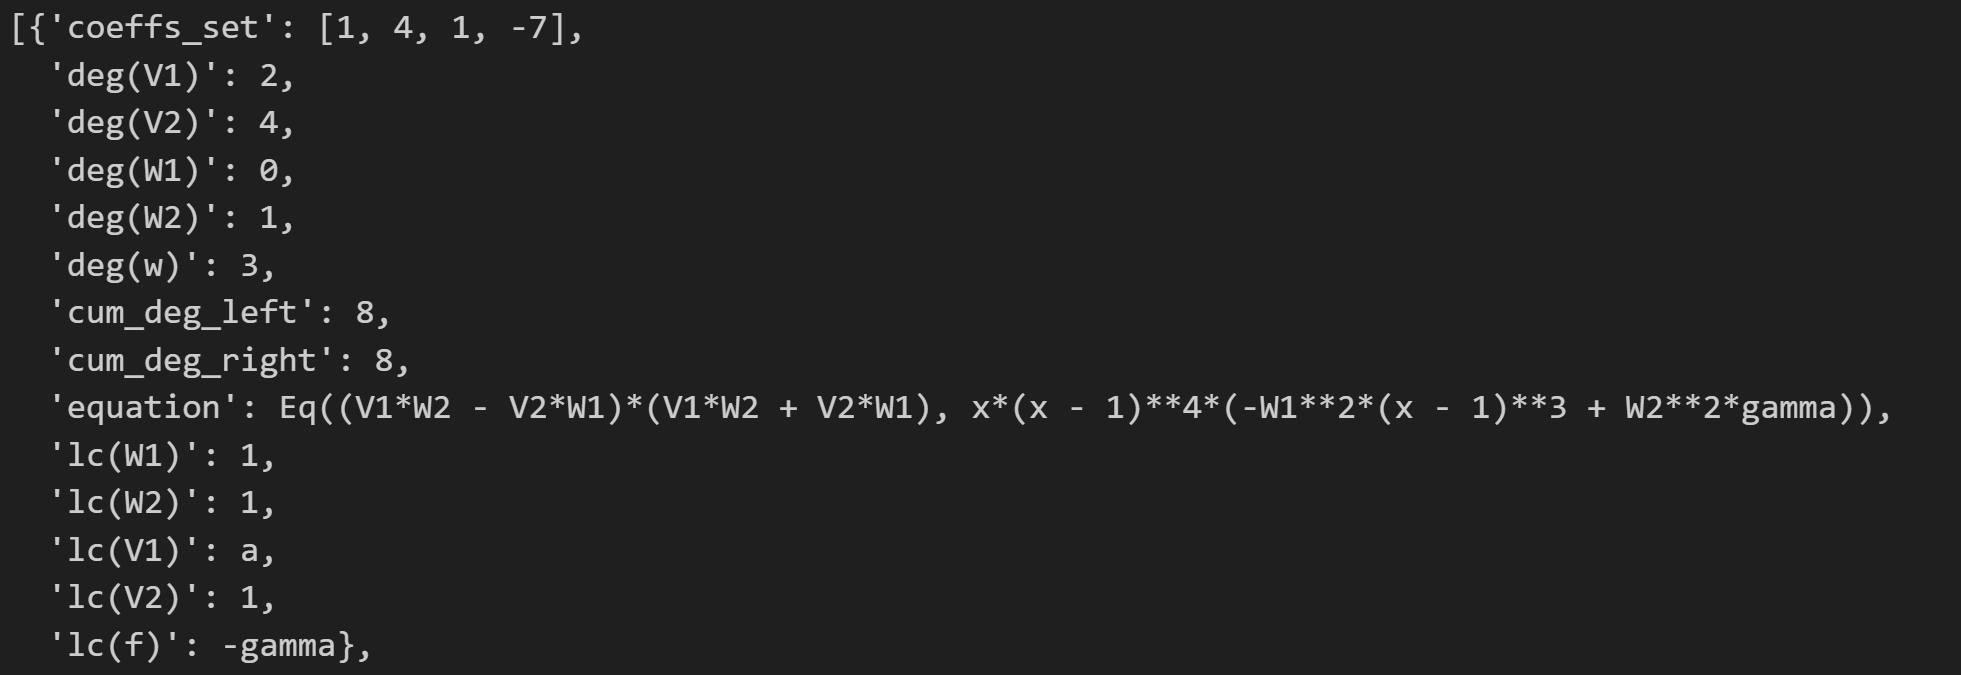
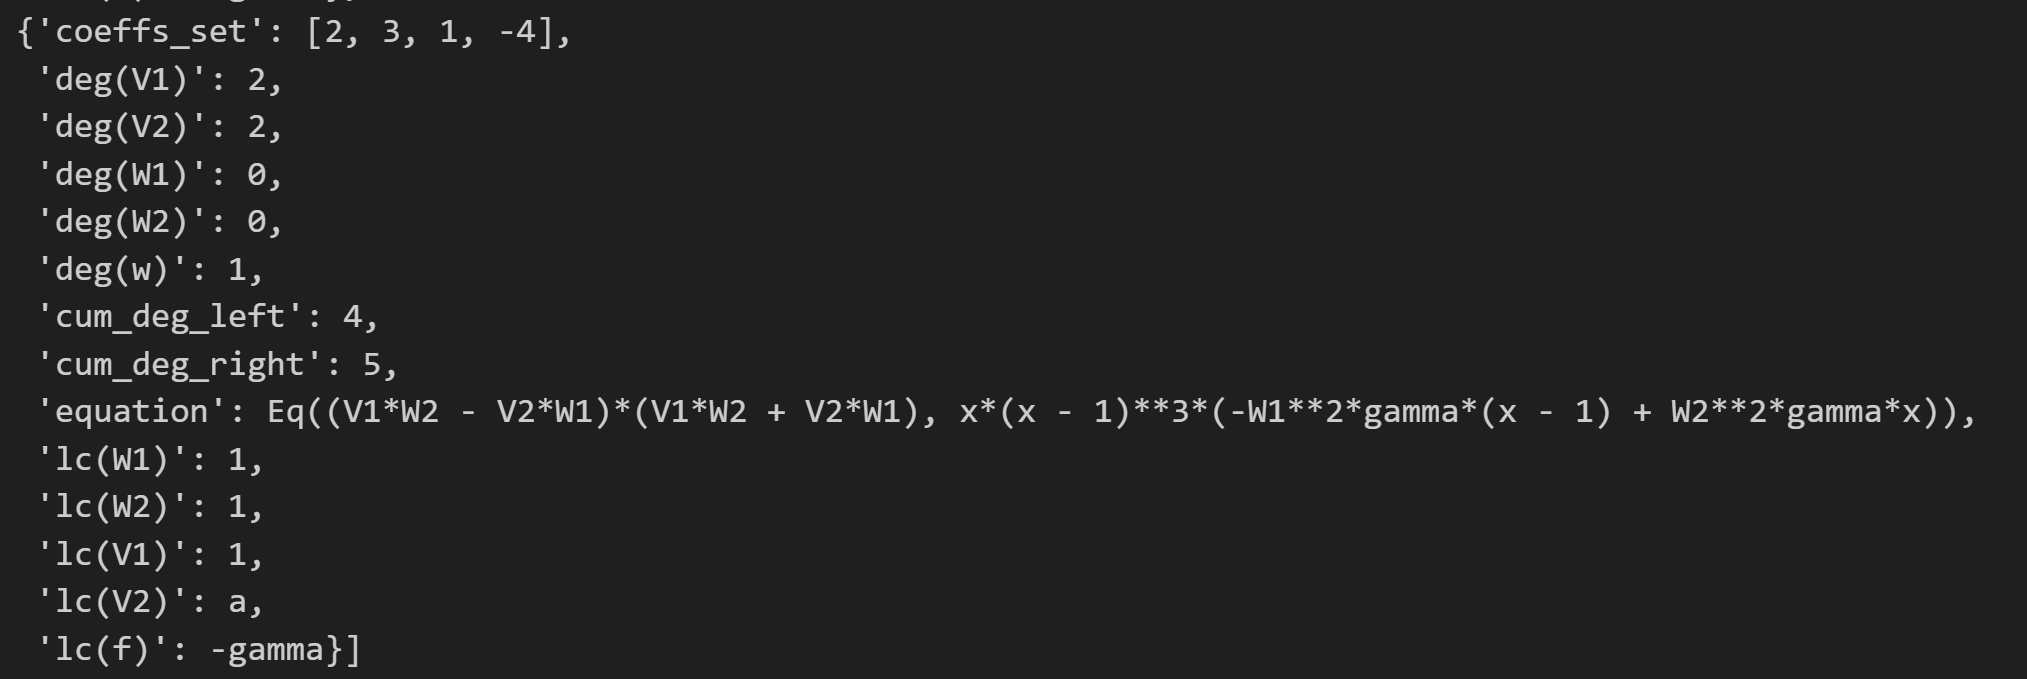

V1*(x - x0) +- V2

W1 = 1

W2 = (x - x0)

w = (x - x1) * (x - x2)**2

In [5]:
x, x0, x1, x2, x3, gamma, p, q, t, w = smp.symbols('x x0 x1 x2 x3 gamma p q t w')

In [6]:
eq_1 = smp.Poly((x1*x**3 + x2*x**2 + x3*x + p) * x, x)
eq_2 = smp.Poly(((x - x0)**2 * gamma*(x - 1) - (x - 1)**4), x)

In [7]:
p1 = smp.Poly((x1*x**3 + x2*x**2 + x3*x + p),x)

quotient, remainder = smp.div(eq_2, p1)

In [9]:
quo_expr = quotient.as_expr()
rem_expr = remainder.as_expr()

In [10]:
eq1 = smp.Eq(quo_expr.subs({x:x1}), p1.subs({x:x1}))
eq2 = smp.Eq(rem_expr, 0)
smp.solve([eq1,eq2])

[{gamma: (p*x*x1 - 4*p*x1 - p*x2 - 6*x**2*x1**2 - 4*x**2*x1*x2 + x**2*x1*x3 - x**2*x2**2 + 4*x*x1**2 - 4*x*x1*x3 - x*x2*x3 - x1**2)/(x1*(p + 2*x**2*x0*x1 + x**2*x1 + x**2*x2 - x*x0**2*x1 - 2*x*x0*x1 + x*x3 + x0**2*x1))}]

In [7]:
eq_1

Poly(x**4 + (-x1 - x2 - x3)*x**3 + (x1*x2 + x1*x3 + x2*x3)*x**2 - x1*x2*x3*x, x, domain='ZZ[x1,x2,x3]')

In [8]:
eq_2

Poly(-x**4 + (gamma + 4)*x**3 + (-2*gamma*x0 - gamma - 6)*x**2 + (gamma*x0**2 + 2*gamma*x0 + 4)*x - gamma*x0**2 - 1, x, domain='ZZ[x0,gamma]')

In [9]:
eq_1_expr = eq_1.as_expr().simplify()
eq_2_expr = eq_2.as_expr().simplify()

In [10]:
# eq1 = smp.Eq(eq_2_expr.subs({x: x1}), 0)
# eq2 = smp.Eq(eq_2_expr.subs({x: x2}), 0)
# eq3 = smp.Eq(eq_2_expr.subs({x: x3}), 0)

# solutions = smp.solve([eq1, eq2, eq3], x1)
# save_results(solutions, 'solutions.txt', mode='w')       

Results written to solutions.txt


In [ ]:
solutions[1][0]

gamma/3 - (-6*gamma*x0 + (-gamma - 3)**2 - 9)/(3*(-27*gamma*x0**2/2 - (-9*gamma - 27)*(2*gamma*x0 + 3)/2 + (-gamma - 3)**3 + sqrt(-4*(-6*gamma*x0 + (-gamma - 3)**2 - 9)**3 + (-27*gamma*x0**2 - (-9*gamma - 27)*(2*gamma*x0 + 3) + 2*(-gamma - 3)**3 - 27)**2)/2 - 27/2)**(1/3)) - (-27*gamma*x0**2/2 - (-9*gamma - 27)*(2*gamma*x0 + 3)/2 + (-gamma - 3)**3 + sqrt(-4*(-6*gamma*x0 + (-gamma - 3)**2 - 9)**3 + (-27*gamma*x0**2 - (-9*gamma - 27)*(2*gamma*x0 + 3) + 2*(-gamma - 3)**3 - 27)**2)/2 - 27/2)**(1/3)/3 + 1

In [11]:
V1_m = smp.Rational(1,2) * (eq_1 + eq_2)
V2 = smp.Rational(1,2) * (-eq_1 + eq_2)

In [12]:
V1_m

Poly((gamma/2 - x1/2 - x2/2 - x3/2 + 2)*x**3 + (-gamma*x0 - gamma/2 + x1*x2/2 + x1*x3/2 + x2*x3/2 - 3)*x**2 + (gamma*x0**2/2 + gamma*x0 - x1*x2*x3/2 + 2)*x - gamma*x0**2/2 - 1/2, x, domain='QQ[x1,x2,x3,x0,gamma]')

In [13]:
V2

Poly(-x**4 + (gamma/2 + x1/2 + x2/2 + x3/2 + 2)*x**3 + (-gamma*x0 - gamma/2 - x1*x2/2 - x1*x3/2 - x2*x3/2 - 3)*x**2 + (gamma*x0**2/2 + gamma*x0 + x1*x2*x3/2 + 2)*x - gamma*x0**2/2 - 1/2, x, domain='QQ[x1,x2,x3,x0,gamma]')

In [14]:
solution = smp.solve(V1_m.subs(x, x0), w)
solution = solution[0]

IndexError: list index out of range

In [ ]:
print(solution)

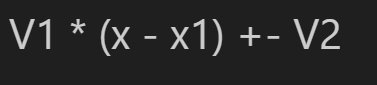

In [14]:
V_q = (V1_m * V1_m)

In [ ]:
V_q

In [16]:
V2_q = V2 * V2
V2_q = V2_q.simplify().subs(w, solution).simplify()

In [17]:
V_q = V_q.simplify().subs(w, solution).simplify()

In [18]:
p1 = smp.Poly((x-x0)**2,x)

quotient, remainder = smp.div(V_q, p1)

In [19]:
V1 = quotient

In [ ]:
V1

In [ ]:
remainder

In [22]:
f = smp.Poly(V2_q - x**4 * (x - 1),x)

In [ ]:
f

In [24]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [25]:
coeffs = f.all_coeffs()

In [ ]:
coeffs[0]

In [ ]:
eq1 = smp.Eq(coeffs[0], 0)
eq2 = smp.Eq(coeffs[1], -gamma)

solution_gamma = smp.solve([eq1, eq2], gamma)
gamma_solution = solution_gamma[gamma]
gamma_solution

In [28]:
f = f.subs(gamma, gamma_solution).simplify()

In [ ]:
f

In [ ]:
f_main = factor_coeffs(f, x)
save_f(f_main,'f.txt',mode='a')

In [31]:
calc = MagmaCalculator()

In [32]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [33]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [34]:
def curve_search(parameters_set):
    for value in parameters_set:
        f = f_main.subs(x0,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [ ]:
curve_search(range(2,10))